training...
quantization...
building new image...


c:\Users\belch\anaconda3\envs\py39\lib\site-packages\minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


done.


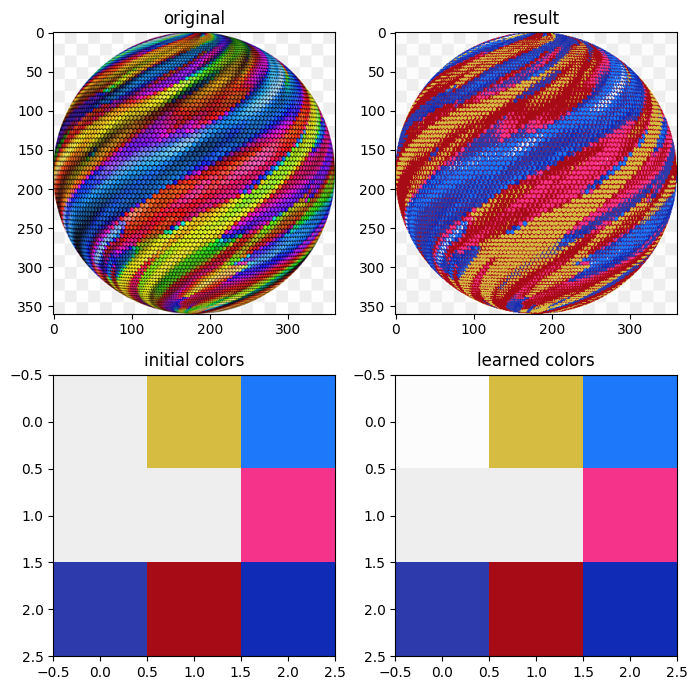

quantization...
building new image...
done.


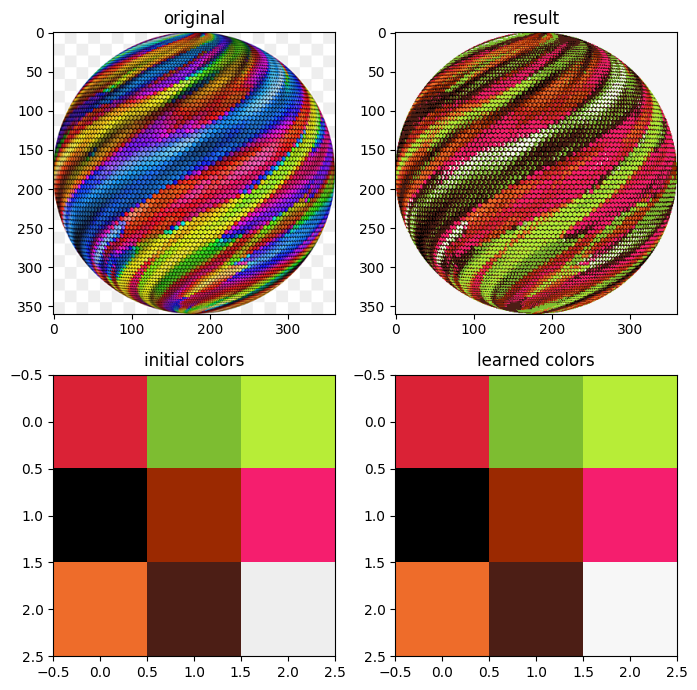

quantization...
building new image...
done.


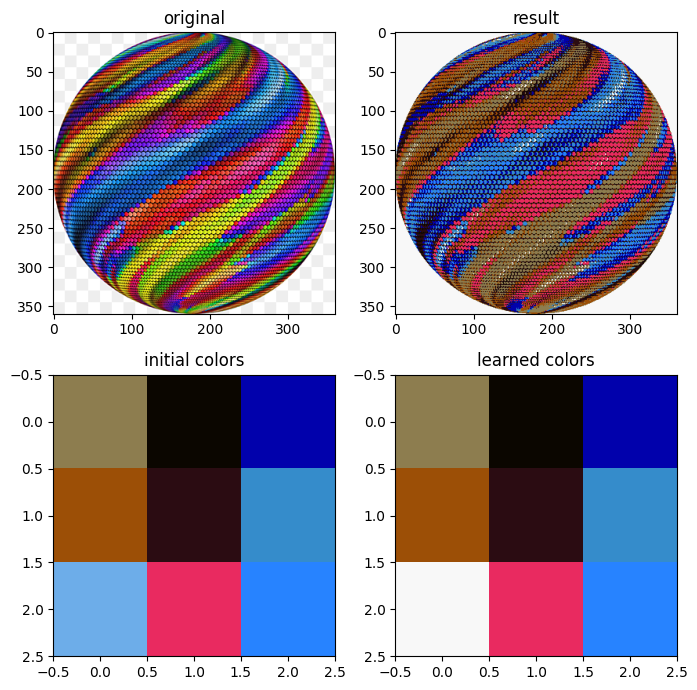

quantization...
building new image...
done.


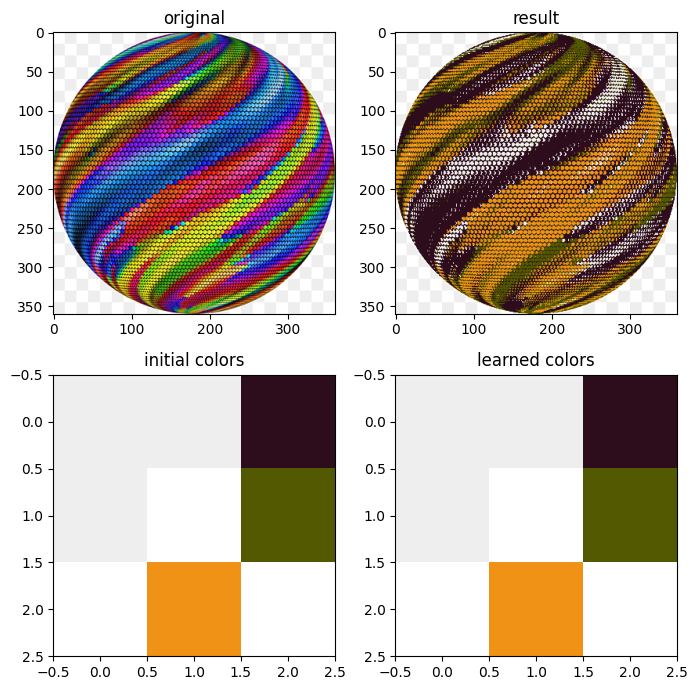

quantization...
building new image...
done.


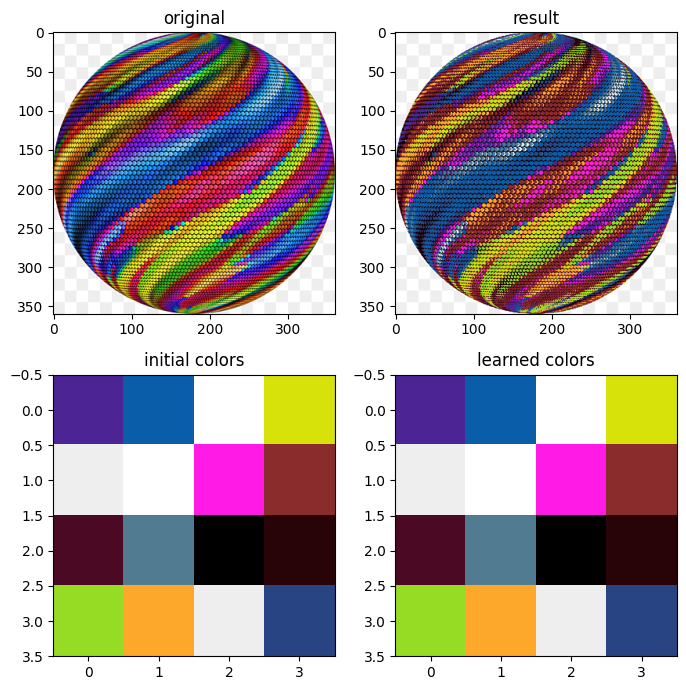

quantization...
building new image...
done.


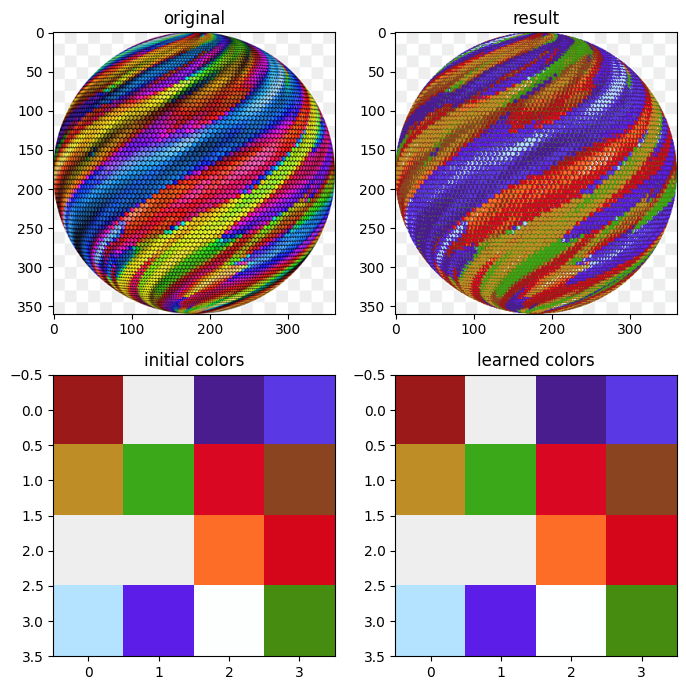

quantization...
building new image...
done.


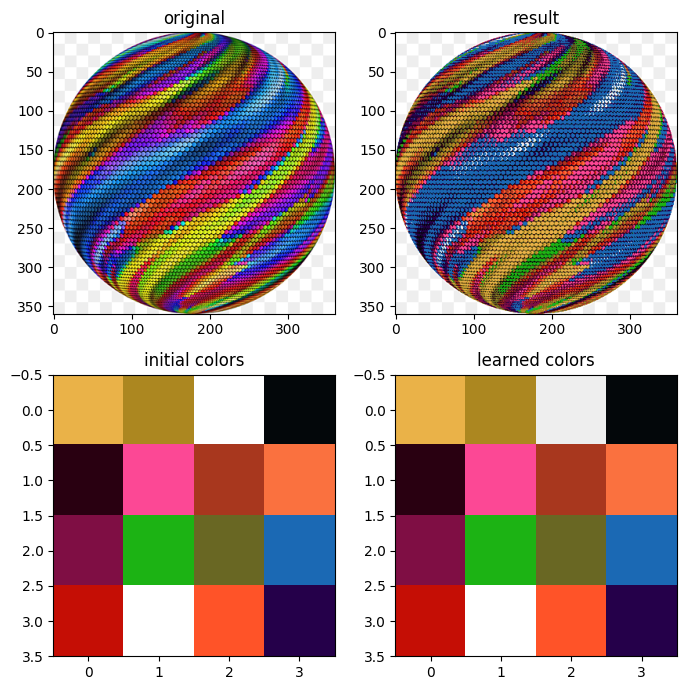

quantization...
building new image...
done.


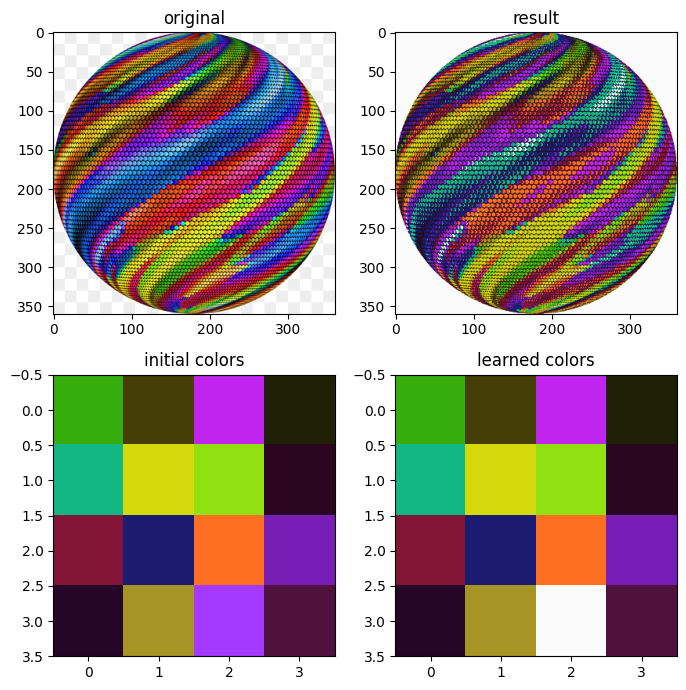

In [17]:
import sys
sys.path.insert(0, '../')
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

# read the image
img = plt.imread('esfera.png')

# reshaping the pixels matrix
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3))

# SOM initialization and training
print('training...')
for XY in range(3,5):
    for lr in np.arange( 0.1, 0.5 , 0.1):
            som = MiniSom(XY, XY, 3, sigma=1,
                        learning_rate=lr, neighborhood_function='bubble')  
            som.random_weights_init(pixels)
            starting_weights = som.get_weights().copy()  # saving the starting weights
            som.train_random(pixels, 50)

            print('quantization...')
            qnt = som.quantization(pixels)  # quantize each pixels of the image
            print('building new image...')
            clustered = np.zeros(img.shape)
            for i, q in enumerate(qnt):  # place the quantized values into a new image
                clustered[np.unravel_index(i, (img.shape[0], img.shape[1]))] = q
            print('done.')

            # show the result
            plt.figure(figsize=(7, 7))
            plt.figure(1)
            plt.subplot(221)
            plt.title('original')
            plt.imshow(img)
            plt.subplot(222)
            plt.title('result')
            plt.imshow(clustered)

            plt.subplot(223)
            plt.title('initial colors')
            plt.imshow(starting_weights, interpolation='none')
            plt.subplot(224)
            plt.title('learned colors')
            plt.imshow(som.get_weights(), interpolation='none')

            plt.tight_layout()
            plt.show()